# PRiAD 5 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD5, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń. **Uwaga** - za każde zadanie można otrzymać 3 pkt, w sumie 9 pkt. Test jest zaliczony jeśli liczba punktów jest większa niż 4 ! Punkty z nadwyżki powyżej 5 zostaną doliczone do punktacji sprawdzianu (czyli za 6 pkt z tego testu +1 pkt ze sprawdzianu; za 7 pkt z testu -> + 2 ze sprawdzianu itd) !

---
**Imię, nazwisko i numer indeksu:** Maciej Czarkowski 292810

In [2]:
# TU JESZCZE RAZ NALEŻY WPISAĆ NUMER INDEKSU - ZAMIAST CYFR 123456
indeks = "292810"  

---

Generowanie idywidualnego zestawu danych.

In [3]:
# TEN FRAGMENT NALEŻY PO PROSTU URUCHOMIĆ (NIC NIE NALEŻY ZMIENIAĆ)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
if indeks == "123456": 
    print('\nWpisz w pierwszym bloku komend (powyżej) swój numer indeksu !!') 
else:        
    n = np.array(list(indeks),dtype = np.int)
    cechy, klasa = make_classification(n_samples=  (n[0]*10+n[1])*4,  n_classes = n[-1]%3+3, class_sep = n[-4]%2 + 2, n_clusters_per_class = 1,
                                   n_features = 10 - n[-4]%2, n_redundant = 2 - n[-3]%2, n_repeated = n[-3]%2 + 1, n_informative = n[-2]%4+3,                                
                                   random_state = n[0]+n[1]+n[2]) 
    dane = pd.concat([pd.DataFrame(cechy), pd.DataFrame(klasa, columns =['klasa'])],axis = 1, sort=False)
    print('\nGOTOWE - możesz rozpoczać rozwiązywanie zadań')


GOTOWE - możesz rozpoczać rozwiązywanie zadań


> **Zadanie 1** Oceń na podstawie odpowiednich wykresów przydatność poszczególnych atrybutów zbioru `dane`  do klasyfikacji, oceń też czy dane wymagają normalizacji lub standaryzacji (3 pkt)

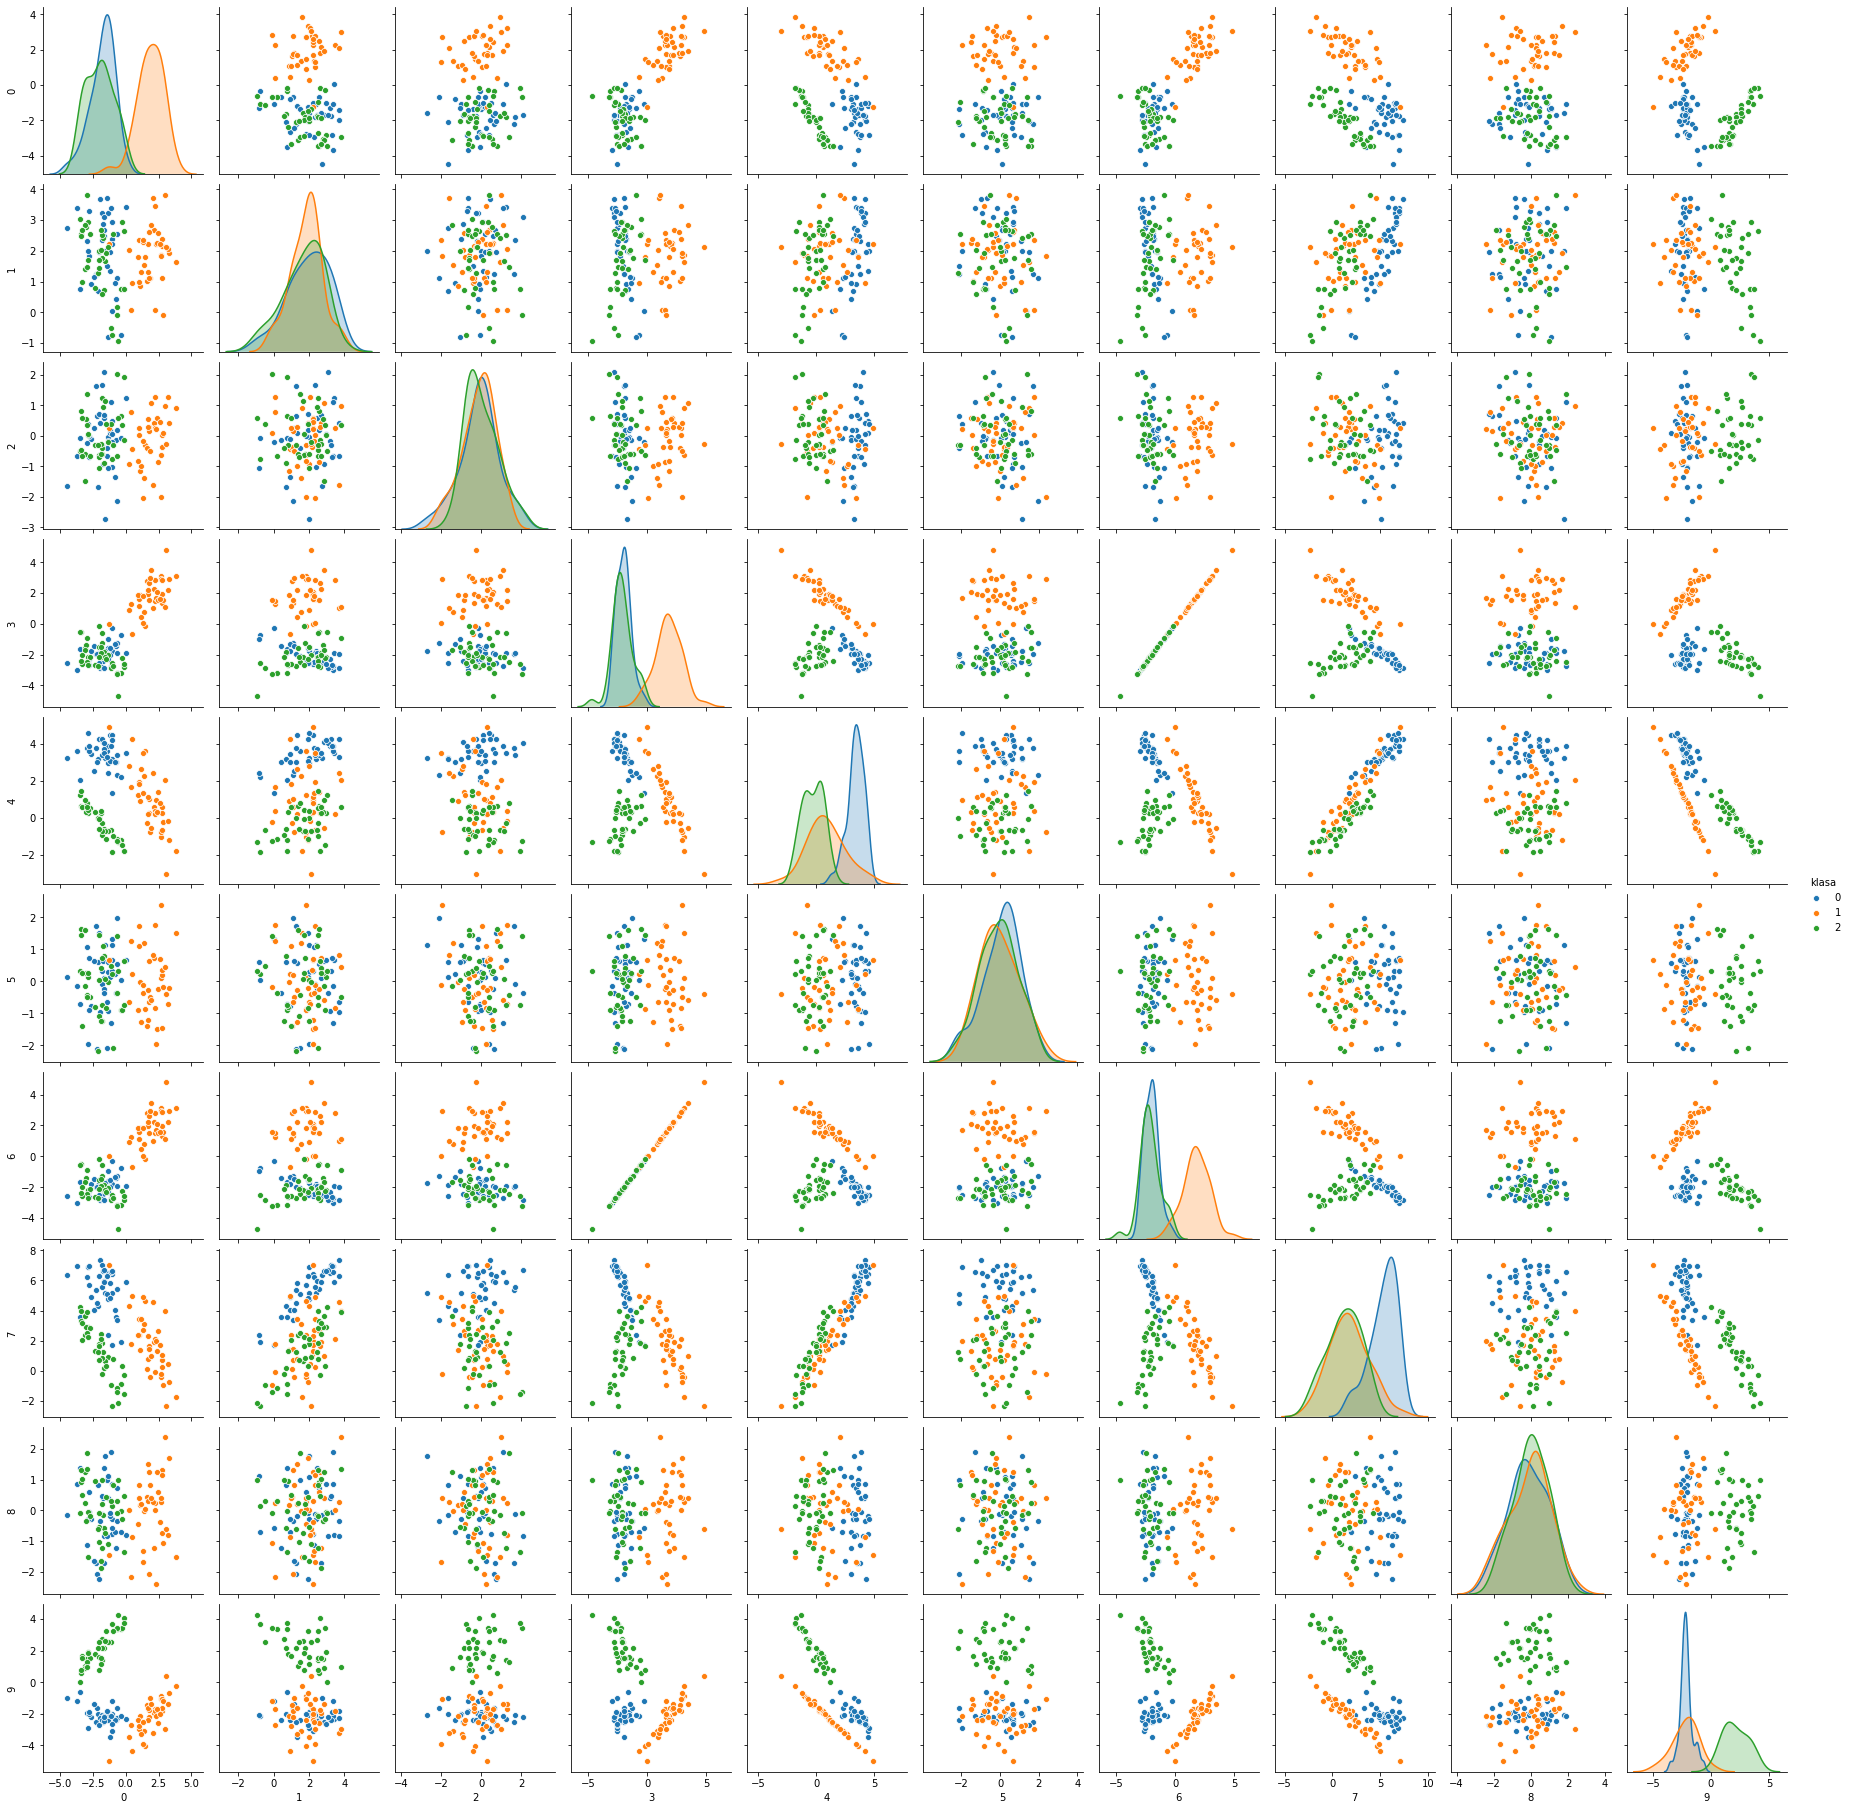

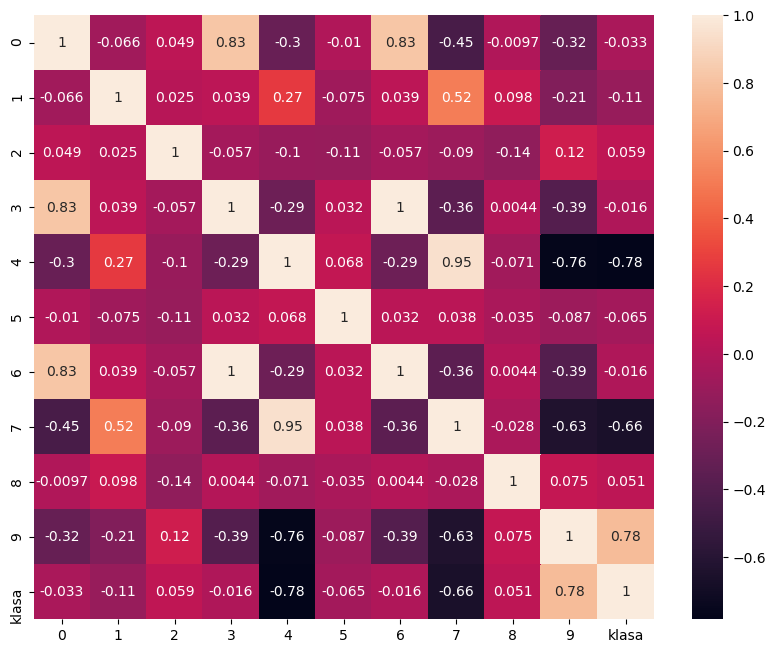

In [3]:
# kod 
sns.pairplot(dane, kind="scatter", hue = "klasa")
#plt.legend(loc = 'upper left')
kor = dane.corr()
plt.figure(figsize=(10,8),dpi = 100)
sns.heatmap(kor,annot = kor)

Wnioski z analizy wyników zad. 1:
* Analizując macierz wykresów punktowych, określającą zależności pomiędzy atrybutami jesteśmy w stanie wyróżnić te, które najlepiej separują klasy. Widzimy, że np przy analizie atrybutu 9 jesteśmy w stanie dosyć wyraźnie wydzielić klasę nr 2. Atrybut 6 i 3 pozwalają za to wyróżnić klasę 1 od innych. Argumentem wyróżniającym klasę 1 od innych jest też atrybut 0.
* Na dość dobrą klasyfikację pozwalają atrybuty 6 i 9 oraz 3 i 9, a także 3 i 4. Wykresy punktowe dla tych par atrybutów pozwalają odseparować od siebie poszczególne klasy. Ostatnia z wymienionych par posłużyła mi do analizy w zadaniu 4.
* Atrybuty 1,2,5,7,8 nie będą zbyt przydatne przy klasyfikacji, gdyż cechują się dużą rozproszonością, nie widać po nich żadnych większych odseparowań pomiędzy grupami punktów.
* Analizując macierz korelacji przedstawioną jako mapa ciepła, jesteśmy w stanie zauważyć, że atrybuty 3 i 6 są skorelowane w stopniu 1, co oznacza, że mają na siebie pełny wpływ. Dzięki temu faktowi, jesteśmy w stanie stwierdzić, że do klasyfikacji w razie ich przydatności możemy wykorzystać tylko jeden z nich, gdyż gwarantuje nam to te same efekty. Jeden z nich stanie się wtedy zbędny w klasyfikacji.
* W powyższym przypadku dane nie wymagają standaryzacji lub normalizacji. Jest to spowodowane faktem, iż atrybuty te posiadają podobne zakresy zmienności, nie ma więc potrzeby standaryzowania ich do określonych przedziałów. Wykorzystanie normalizacji do małego przedziału w tym przypadku, mogłoby nam rozmyć miarę rozproszenia danych, która jest zauważalna dla niektórych atrybutów.


> **Zadanie 2** Dobierz najlepszy klasyfikator przy uzwględnieniu wszystkich atrybutów (3 pkt)

In [4]:
#funkcje używane w zadaniu 2 oraz 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    ucz = pd.crosstab(dane["dec_ucz"],wynik_ucz)
    print(ucz) 
    sum_ucz = ucz.iloc[0,0] + ucz.iloc[1,1] + ucz.iloc[2,2]
    print('Ratio poprawnych klasyfikacji (max = 1): ' + str(sum_ucz/ucz.sum().sum()))
    print("Macierz pomyłek dla zbioru testowego")
    test = pd.crosstab(dane["dec_test"],wynik_test)
    print(test)
    sum_test = test.iloc[0,0] + test.iloc[1,1] + test.iloc[2,2]
    print('Ratio poprawnych klasyfikacji (max = 1): ' + str(sum_test/test.sum().sum()))
def podziel(df,proporcja):
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}
def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    if (kontur == 1):    
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Liczba obiektów zbioru uczącego:  75
Liczba obiektów zbioru testowego:  41


Metoda k-najbliższych sąsiadów

Macierze pomyłek dla 1-NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      29   0   0
1       0  21   0
2       0   0  25
Ratio poprawnych klasyfikacji (max = 1): 1.0
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      10   0   0
1       1  17   0
2       0   0  13
Ratio poprawnych klasyfikacji (max = 1): 0.975609756097561

Macierze pomyłek dla 3-NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      29   0   0
1       1  20   0
2       0   0  25
Ratio poprawnych klasyfikacji (max = 1): 0.9866666666666667
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      10   0   0
1       1  17   0
2       0   0  13
Ratio poprawnych klasyfikacji (max = 1): 0.975609756097561

Macierze pomyłek dla 5-NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      

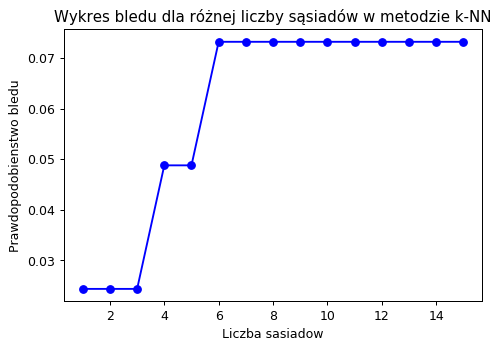

In [8]:
# kod -- uwzględniam wszystkie atrybuty od 0 do 9 -- range(0,10)
dane1 = podziel(dane,0.35)
print('Liczba obiektów zbioru uczącego: ', len(dane1["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane1["opis_test"]))
print('\n\nMetoda k-najbliższych sąsiadów')
for k in [1,3,5,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    print('\nMacierze pomyłek dla ' + str(k) + '-NN:')
    weryfikuj(model_knn,dane1,list(range(0,10)))

kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(dane1['opis_ucz'],dane1['dec_ucz'])
    predictions = model.predict(dane1['opis_test'])
    rss_all[k-1] = 1-model.score(dane1['opis_test'],dane1['dec_test'])
plt.figure(dpi=90)
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu dla różnej liczby sąsiadów w metodzie k-NN')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

print('\n\nMacierze pomyłek dla metody najbliższego prototypu')
model = NearestCentroid()
weryfikuj(model,dane1,list(range(0,10)))

print('\n\nMacierze pomyłek dla klasyfikatora Bayesa')
model = GaussianNB()
weryfikuj(model,dane1,list(range(0,10)))

for g in [2,3,4,5,6]:
    model = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "\nMetoda drzewa decyzyjnego o głębokości " + str(g)
    print(tekst)
    weryfikuj(model,dane1,list(range(0,10)))

Wnioski z zad. 2:
* Analizując powyższe metody widzimy, iż wszystkie z nich spisały się bardzo dobrze jeśli chodzi o klasyfikację zadanego zbioru danych przy uwzględnieniu wszystkich atrybutów -- ilości pomyłek są niewielkie.
* Najwyższe ratio (stosunek poprawnych klasyfikacji do wszystkich) otrzymujemy dla metod k-NN (najbliższych sąsiadów). Ciekawym zauważenia faktem jest to, że dla niewielkiej ilości sąsiadów wynik obył się bez pomyłek, i to właśnie klasyfikator k-NN przy niewielkim k jest najlepszym klasyfikatorem dla tego zestawu danych.
* Pozostałe klasyfikatory również zaprezentowały bardzo wysokie ratio dla zbiorów uczących i testowych, nieznacznie odstające od 1.
* Najbliższa "zwycięzcy" była metoda Bayesa, jednakże podobne efekty dała również metoda drzewa decyzyjnego.
* Najgorzej zaprezentowała się metoda najbliższego prototypu, która z wynikami 0.93 dla zbioru uczącego i 0.97 dla zbioru testowego uplasowała się na ostatnim miejscu w zestawieniu, jednakże należy zaznaczyć, że również jest to bardzo zadowalający wynik.

> **Zadanie 3** Dobierz najlepszy klasyfikator biorąc pod uwagę tylko wybrane cechy (każdy się sam zastanawia jak wybrać) i porównać z wynikiem zad. 2 (3 pkt)

Liczba obiektów zbioru uczącego:  75
Liczba obiektów zbioru testowego:  41

Macierze pomyłek dla 1NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      23   0   0
1       0  27   0
2       0   0  25
Ratio poprawnych klasyfikacji (max = 1): 1.0
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      16   0   0
1       0  12   0
2       1   0  12
Ratio poprawnych klasyfikacji (max = 1): 0.975609756097561

Macierze pomyłek dla 3NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      23   0   0
1       0  27   0
2       0   0  25
Ratio poprawnych klasyfikacji (max = 1): 1.0
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      16   0   0
1       0  12   0
2       1   0  12
Ratio poprawnych klasyfikacji (max = 1): 0.975609756097561

Macierze pomyłek dla 5NN:
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      23   0   0
1       0  27   0
2       0   0  25
Rati

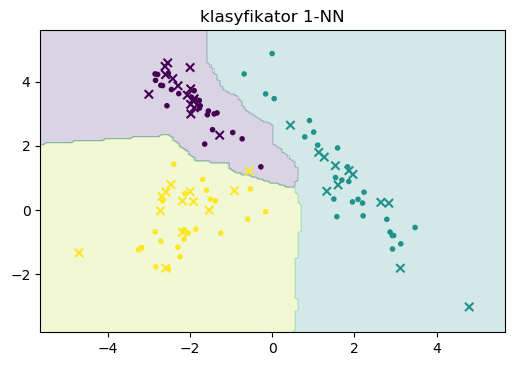

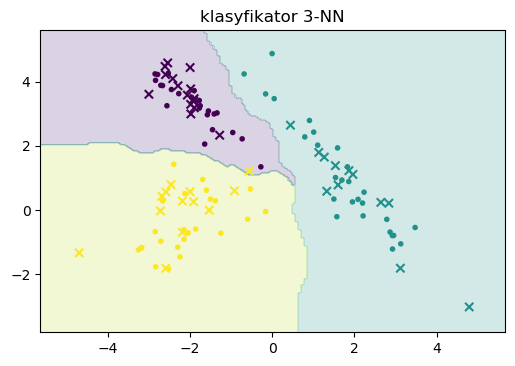

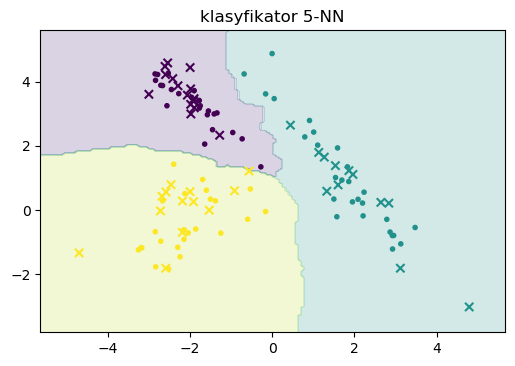

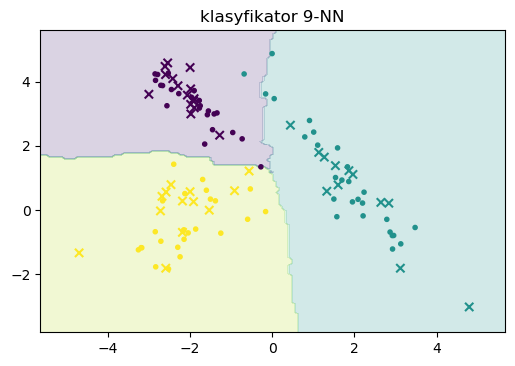

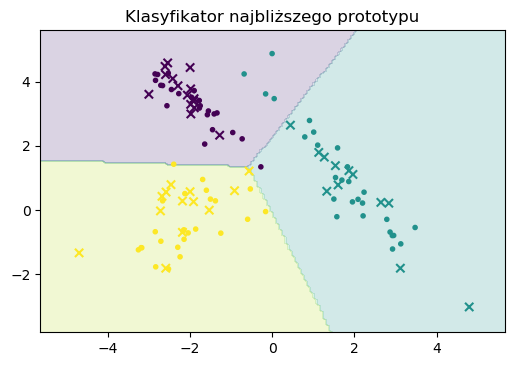

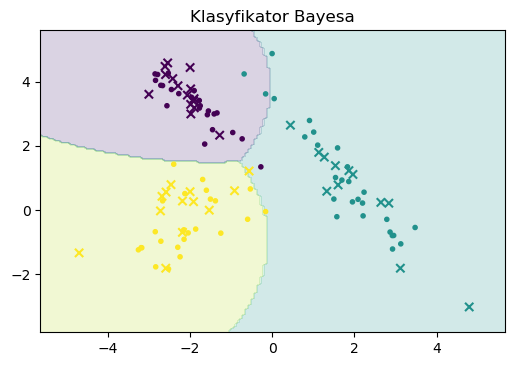

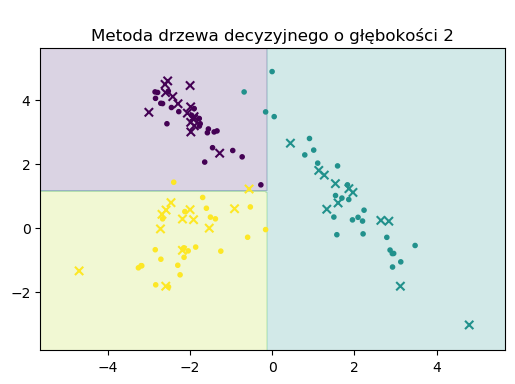

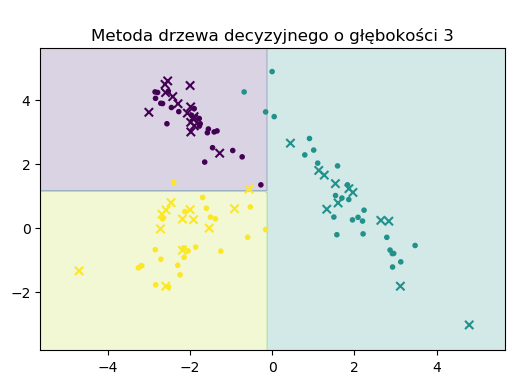

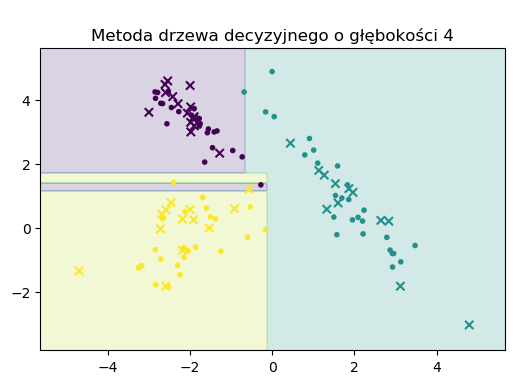

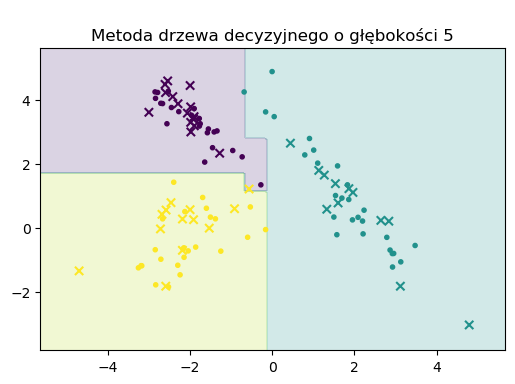

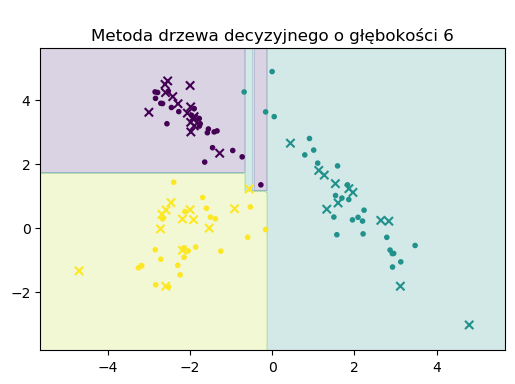

In [9]:
# kod -- wykorzystuje atrybuty 3 i 4
dane1 = podziel(dane,0.35)
print('Liczba obiektów zbioru uczącego: ', len(dane1["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane1["opis_test"]))

for k in [1,3,5,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    granice(model,dane1,3,4,"klasyfikator " + str(k)+ "-NN")
    print('\nMacierze pomyłek dla ' + str(k) + 'NN:')
    weryfikuj(model,dane1,[3,4])

print('\n\nMacierze pomyłek dla metody najbliższego prototypu')
model = NearestCentroid()
granice(model,dane1,3,4,"Klasyfikator najbliższego prototypu")
weryfikuj(model,dane1,[3,4])

print('\n\nMacierze pomyłek dla klasyfikatora Bayesa')
model = GaussianNB()
granice(model,dane1,3,4,"Klasyfikator Bayesa")
weryfikuj(model,dane1,[3,4])

print('\n\nMacierze pomyłek dla drzewa decyzyjnego')
for g in [2,3,4,5,6]:
    model = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "\nMetoda drzewa decyzyjnego o głębokości " + str(g)
    print(tekst)
    granice(model,dane1,3,4,tekst)
    weryfikuj(model,dane1,[3,4])

Wnioski z analizy wyników zad. 3:
* W przypadku analizy klasyfikacji różnymi metodami dla argumentów 3 i 4, które cechują się widocznym odseparowaniem klas, najlepszym klasyfikatorem okazał się klasyfikator najbliższego sąsiada dla 5 sąsiadów, który bezbłędnie sklasyfikował wszystkie punkty.
* Znów najgorszą efektywność zaprezentowała metoda najbliższego prototypu. Nie jest to zaskoczeniem, gdyż korzysta ona z centroidów, które dla klasy 1, która jest dosyć rozciągła, nie są trafnym rozwiązaniem. 
* W porównaniu do zadania 2, klasyfikatory wykazały podobną ilość pomyłek, plasującą się na niezwykle niskim poziomie (średnio 2-3%). Błędy w klasyfikacji dla atrybutów 3 i 4 wynikają z rozciągłości jednej z klas, której kilka punktów może "wpaść" w obszary innych klas dla różnych metod klasyfikacji. Są to jednak błędy niewielkie, a ich ilość pozwala nam nazwać wszystkie metody klasyfikujące satysfakcjonującymi, choć najlepszą w obu przypadkach okazała się metoda najbliższego sąsiada. Należy też zaznaczyć, że efektywność poszczególnych metod może zależeć i nieznacznie się wahać w zależności od otrzymanego zbioru uczącego i testowego oraz proporcji podziału (w moim przypadku ustawionej na 0.35).


> **Zadanie 4** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD5_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.